In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the data

df_train = pd.read_csv('train_hr.csv', index_col = 0) 

In [3]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_train.shape

(54808, 13)

In [5]:
# Dropping the gender variable as the promotion given will be on performance and not on gender basis

df_train.drop('gender', axis = 1, inplace = True)

In [6]:
# Creating the copy of original data 

df_train1 = df_train.copy()

In [7]:
# Checking for Missing Values

df_train1.isnull().sum()

department                 0
region                     0
education               2409
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# Filling the Missing Values 

#print(df_train['education'].mode()[0])
#print(df_train['previous_year_rating'].mean())
#print(df_train['previous_year_rating'].median())
#print(df_train['previous_year_rating'].mode()[0])

# Filling the Missing values in education variable with mode 
df_train1['education'].fillna(df_train1['education'].mode()[0], inplace = True)


# Filling the Missing values in previous_year_rating variable with zero 
# 0 -> they have only 1 year experience
df_train1['previous_year_rating'].fillna(0,inplace = True)

In [9]:
# Checking for missing values

df_train1.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
# Converting the categorical data to numeric data using Label Encoder

# Creating a list of column names with categorical data

colname = ['department', 'region', 'education', 'recruitment_channel']
colname

['department', 'region', 'education', 'recruitment_channel']

In [11]:
df_train1[colname].head()

,department,region,education,recruitment_channel
employee_id,,,,
65438,Sales & Marketing,region_7,Master's & above,sourcing
65141,Operations,region_22,Bachelor's,other
7513,Sales & Marketing,region_19,Bachelor's,sourcing
2542,Sales & Marketing,region_23,Bachelor's,other
48945,Technology,region_26,Bachelor's,other


In [12]:
# Applying the Label Encoder Technique

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in colname:
    df_train1[i] = le.fit_transform(df_train1[i])

In [13]:
df_train1[colname].head()

,department,region,education,recruitment_channel
employee_id,,,,
65438,7,31,2,2
65141,4,14,0,0
7513,7,10,0,2
2542,7,15,0,0
48945,8,18,0,0


In [14]:
# Splitting the data into X & Y

X = df_train1.values[:,:-1]
Y = df_train1.values[:,-1]
Y = Y.astype('int')

In [15]:
# Scaling the data using Standardization Technique

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X)
X = sc.transform(X)
X

array([[ 0.80893285,  1.77652645,  1.61975831, ...,  1.35687789,
        -0.15401776, -1.07593145],
       [-0.38818322, -0.16303375, -0.62883817, ..., -0.73698599,
        -0.15401776, -0.25328242],
       [ 0.80893285, -0.61940086, -0.62883817, ..., -0.73698599,
        -0.15401776, -1.00114517],
       ...,
       [-1.98433798, -1.76031862, -0.62883817, ...,  1.35687789,
        -0.15401776,  1.1676568 ],
       [ 0.80893285,  2.00471   , -0.62883817, ..., -0.73698599,
        -0.15401776, -1.37507655],
       [-1.1862606 , -0.16303375, -0.62883817, ..., -0.73698599,
        -0.15401776, -1.07593145]])

In [16]:
# Checking the datatypes

df_train1.dtypes

department                int32
region                    int32
education                 int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [17]:
# Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 10)

### CREATING A FUNCTON TO EVALUATE THE MODELS 

In [18]:
from sklearn.metrics \
import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc


def metric(actual_values, predicted_values):
    l = []
    cfm = confusion_matrix(actual_values,predicted_values)
    # print(cfm[0,1],cfm[1,0],cfm[0,1]+cfm[1,0],sep = ',')
    print(cfm)
    
    print('\nClassification Report\n',classification_report(actual_values,predicted_values))
    
    acc = round(accuracy_score(actual_values,predicted_values),4)
    l.append(acc)
    print('\nAccuracy of Model :',acc)
    
    
    # Precision value of class 1
    pr = round(precision_score(actual_values,predicted_values),4)
    l.append(pr)
    
    # Recall value of class 1
    re = round(recall_score(actual_values,predicted_values),4)
    l.append(re)
    
    # F1-score value of class 1
    f1 = round(f1_score(actual_values,predicted_values),4)
    l.append(f1)
    
    # Type I error value
    l.append(cfm[0,1])
    
    # Type II error value
    l.append(cfm[1,0])
    
    # Total error value 
    l.append(cfm[0,1]+cfm[1,0])
    # print(l)
    return l

In [19]:
# For the storing the results of the Models

result = pd.DataFrame(columns = ['Algorithm','Overall Accuracy','Precision Value','Recall Value','F1-Score',
                                 'Type I Error','Type II Error', 'Total Error'])

result['Algorithm'] = ['Logistic Regression', 'KNN', 'SVM','Decision Tree','Random Forest']

result.set_index('Algorithm', inplace = True)

result_bal = result.copy()

#result.head()

## LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


def logistic(X_tr, Y_tr, X_te): 
    classifier.fit(X_tr, Y_tr)
    return(classifier.predict(X_te))

In [21]:
Y_pred_lr = logistic(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_lr)

j = 0
for i in result.columns:
    result.loc['Logistic Regression',i] = l[j]
    j += 1

[[14994    70]
 [ 1285    94]]

Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.57      0.07      0.12      1379

    accuracy                           0.92     16443
   macro avg       0.75      0.53      0.54     16443
weighted avg       0.89      0.92      0.89     16443


Accuracy of Model : 0.9176


## KNEIGHBOURS CLASSIFIER (KNN)

In [22]:
'''
from sklearn.neighbors import KNeighborsClassifier

for K in range(1,31):
model_KNN = KNeighborsClassifier(K, metric = "euclidean")
model_KNN.fit(X_train, Y_train)
Y_pred = model_KNN.predict(X_test)
print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\n\nfor K in range(1,31):\nmodel_KNN = KNeighborsClassifier(K, metric = "euclidean")\nmodel_KNN.fit(X_train, Y_train)\nY_pred = model_KNN.predict(X_test)\nprint ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)\n'

In [23]:
# KNeighbors_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 19, metric = 'euclidean')

def knncl(X_tr, Y_tr, X_te):

    #fit the model on the data and predict the values
    model_KNN.fit(X_tr, Y_tr)
    return(model_KNN.predict(X_te))

In [24]:
Y_pred_knn = knncl(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_knn)

j = 0
for i in result.columns:
    result.loc['KNN',i] = l[j]
    j += 1

[[15029    35]
 [ 1255   124]]

Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.78      0.09      0.16      1379

    accuracy                           0.92     16443
   macro avg       0.85      0.54      0.56     16443
weighted avg       0.91      0.92      0.89     16443


Accuracy of Model : 0.9215


## SUPPORT VECTOR MACHINE (SVM)

In [25]:
from sklearn import svm
svc_model = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 0.1)

def svm_mod(X_tr, Y_tr, X_te):
    svc_model.fit(X_tr, Y_tr)
    return(svc_model.predict(X_te))

In [26]:
Y_pred_svm = svm_mod(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_svm)


j = 0
for i in result.columns:
    result.loc['SVM',i] = l[j]
    j += 1

[[15044    20]
 [ 1240   139]]

Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.87      0.10      0.18      1379

    accuracy                           0.92     16443
   macro avg       0.90      0.55      0.57     16443
weighted avg       0.92      0.92      0.89     16443


Accuracy of Model : 0.9234


## DECISION TREE

In [27]:
#predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(random_state = 10)

def decisiontree(X_tr, Y_tr, X_te):

    #fit the model on the data and predict the values
    model_DecisionTree.fit(X_tr, Y_tr)
    return(model_DecisionTree.predict(X_te))

In [28]:
Y_pred_dt = decisiontree(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_dt)

j = 0
for i in result.columns:
    result.loc['Decision Tree',i] = l[j]
    j += 1

[[14096   968]
 [  763   616]]

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     15064
           1       0.39      0.45      0.42      1379

    accuracy                           0.89     16443
   macro avg       0.67      0.69      0.68     16443
weighted avg       0.90      0.89      0.90     16443


Accuracy of Model : 0.8947


## RANDOM FOREST

In [29]:
#predicting using the Random_Forest_Classifier

from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier(100, random_state = 10)

def randomforest(X_tr, Y_tr, X_te):

    #fit the model on the data and predict the values
    model_RandomForest.fit(X_tr,Y_tr)
    return(model_RandomForest.predict(X_te))

In [30]:
Y_pred_rf = randomforest(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_rf)

j = 0
for i in result.columns:
    result.loc['Random Forest',i] = l[j]
    j += 1

[[14958   106]
 [  962   417]]

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     15064
           1       0.80      0.30      0.44      1379

    accuracy                           0.94     16443
   macro avg       0.87      0.65      0.70     16443
weighted avg       0.93      0.94      0.92     16443


Accuracy of Model : 0.935


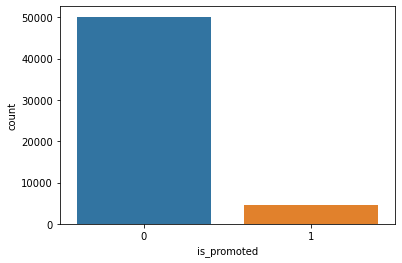

In [31]:
sns.countplot(x = 'is_promoted', data = df_train1)

## MODEL EVALUATION ON UNBALANCED DATA

In [32]:
result.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.9176,0.5732,0.0682,0.1218,70,1285,1355
KNN,0.9215,0.7799,0.0899,0.1612,35,1255,1290
SVM,0.9234,0.8742,0.1008,0.1808,20,1240,1260
Decision Tree,0.8947,0.3889,0.4467,0.4158,968,763,1731
Random Forest,0.935,0.7973,0.3024,0.4385,106,962,1068


# OVERSAMPLING / UPSAMPLING 

In [33]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train1[df_train1.is_promoted==0]
df_minority = df_train1[df_train1.is_promoted==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace = True, # sample with replacement
                                 n_samples = 50140, # to match majority class
                                 random_state = 10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

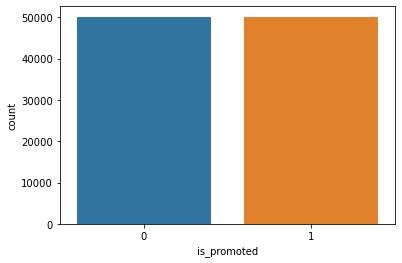

In [34]:
sns.countplot(x = 'is_promoted', data = df_upsampled)

In [35]:
X1 = df_upsampled.values[:,:-1]
Y1 = df_upsampled.values[:,-1]
Y1 = Y1.astype('int')

In [36]:
sc.fit(X1)
X1 = sc.transform(X1)
print(X1)

[[ 0.80095407  1.76473212  1.54534627 ...  0.98195379 -0.2672541
  -1.23779348]
 [-0.38713063 -0.1773577  -0.65882154 ... -1.01837786 -0.2672541
  -0.48025744]
 [ 0.80095407 -0.63432001 -0.65882154 ... -1.01837786 -0.2672541
  -1.16892656]
 ...
 [ 1.19698231 -0.06311712  1.54534627 ...  0.98195379 -0.2672541
   0.75934699]
 [ 0.40492584  0.39384519 -0.65882154 ...  0.98195379 -0.2672541
   1.31028229]
 [-1.97124358 -0.1773577  -0.65882154 ... -1.01837786 -0.2672541
   1.3791492 ]]


In [37]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.3,
                                                    random_state = 10)

### PREDICTIONS ON BALANCED DATA
### LOGISTIC REGRESSION

In [38]:
Y_pred_lr = logistic(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_lr)

j = 0
for i in result_bal.columns:
    result_bal.loc['Logistic Regression',i] = l[j]
    j += 1

[[10677  4338]
 [ 3986 11083]]

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     15015
           1       0.72      0.74      0.73     15069

    accuracy                           0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084


Accuracy of Model : 0.7233


### KNN

In [39]:
Y_pred_knn = knncl(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_knn)

j = 0
for i in result_bal.columns:
    result_bal.loc['KNN',i] = l[j]
    j += 1

[[11072  3943]
 [ 1555 13514]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80     15015
           1       0.77      0.90      0.83     15069

    accuracy                           0.82     30084
   macro avg       0.83      0.82      0.82     30084
weighted avg       0.83      0.82      0.82     30084


Accuracy of Model : 0.8172


### SVM

In [40]:
Y_pred_svm = svm_mod(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_svm)

j = 0
for i in result_bal.columns:
    result_bal.loc['SVM',i] = l[j]
    j += 1

[[10231  4784]
 [ 1576 13493]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.68      0.76     15015
           1       0.74      0.90      0.81     15069

    accuracy                           0.79     30084
   macro avg       0.80      0.79      0.79     30084
weighted avg       0.80      0.79      0.79     30084


Accuracy of Model : 0.7886


### DECISION TREE

In [41]:
Y_pred_dt = decisiontree(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_dt)

j = 0
for i in result_bal.columns:
    result_bal.loc['Decision Tree',i] = l[j]
    j += 1

[[13955  1060]
 [    0 15069]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     15015
           1       0.93      1.00      0.97     15069

    accuracy                           0.96     30084
   macro avg       0.97      0.96      0.96     30084
weighted avg       0.97      0.96      0.96     30084


Accuracy of Model : 0.9648


### RANDOM FOREST

In [42]:
Y_pred_rf = randomforest(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_rf)

j = 0
for i in result_bal.columns:
    result_bal.loc['Random Forest',i] = l[j]
    j += 1

[[14410   605]
 [    0 15069]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     15015
           1       0.96      1.00      0.98     15069

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084


Accuracy of Model : 0.9799


## MODEL EVALUATION ON UNBALANCED DATA

In [43]:
result.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.9176,0.5732,0.0682,0.1218,70,1285,1355
KNN,0.9215,0.7799,0.0899,0.1612,35,1255,1290
SVM,0.9234,0.8742,0.1008,0.1808,20,1240,1260
Decision Tree,0.8947,0.3889,0.4467,0.4158,968,763,1731
Random Forest,0.935,0.7973,0.3024,0.4385,106,962,1068


## MODEL EVALUATION ON BALANCED DATA

In [44]:
result_bal.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.7233,0.7187,0.7355,0.727,4338,3986,8324
KNN,0.8172,0.7741,0.8968,0.831,3943,1555,5498
SVM,0.7886,0.7383,0.8954,0.8093,4784,1576,6360
Decision Tree,0.9648,0.9343,1,0.966,1060,0,1060
Random Forest,0.9799,0.9614,1,0.9803,605,0,605


## ACTUAL TEST DATA

### Performing all the EDA steps performed on Training data

In [45]:
df_test = pd.read_csv('test_hr.csv', index_col = 0)

In [46]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [47]:
df_test1 = df_test.copy()

In [48]:
df_test1.drop('gender', axis = 1, inplace = True)

In [49]:
df_test1.shape

(23490, 11)

In [50]:
df_test1.isnull().sum()

department                 0
region                     0
education               1034
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [51]:
print(df_test1['education'].mode()[0])


df_test1['education'].fillna(df_test1['education'].mode()[0], inplace = True)
df_test1['previous_year_rating'].fillna(0, inplace = True)

Bachelor's


In [52]:
df_test1.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [53]:
df_test1[colname].head()

,department,region,education,recruitment_channel
employee_id,,,,
8724,Technology,region_26,Bachelor's,sourcing
74430,HR,region_4,Bachelor's,other
72255,Sales & Marketing,region_13,Bachelor's,other
38562,Procurement,region_2,Bachelor's,other
64486,Finance,region_29,Bachelor's,sourcing


In [54]:
for i in colname:
    df_test1[i] = le.fit_transform(df_test1[i])

In [55]:
df_test1[colname].head()

,department,region,education,recruitment_channel
employee_id,,,,
8724,8,18,0,2
74430,2,28,0,0
72255,7,4,0,0
38562,5,11,0,0
64486,1,21,0,2


In [56]:
X_Test = df_test1.values[:,:]
X_Test

array([[ 8., 18.,  0., ...,  1.,  0., 77.],
       [ 2., 28.,  0., ...,  0.,  0., 51.],
       [ 7.,  4.,  0., ...,  0.,  0., 47.],
       ...,
       [ 2.,  7.,  0., ...,  0.,  0., 50.],
       [ 5., 24.,  0., ...,  0.,  0., 70.],
       [ 8.,  8.,  2., ...,  1.,  0., 89.]])

In [57]:
X_Test = sc.transform(X_Test)
# print(X_Test)

In [58]:
Y_pred_rdf = model_RandomForest.predict(X_Test)

In [59]:
df_test['Promoted'] = Y_pred_rdf.astype(int)

In [60]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Promoted
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


In [61]:
df_test['Promoted'] = df_test['Promoted'].map({1 : 'Yes', 0 : 'No'})
#print(df_test['Random_Forest'])
df_test.to_csv('Final_Predictions.csv')

In [62]:
df_test.shape

(23490, 13)

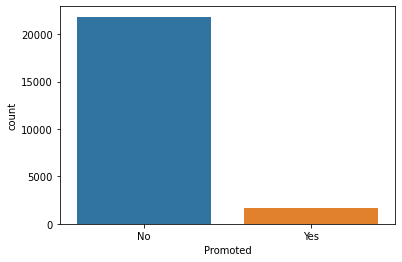

In [63]:
sns.countplot(x = 'Promoted', data = df_test)

In [64]:
df_test['Promoted'].value_counts()

No     21849
Yes     1641
Name: Promoted, dtype: int64

# ANN - MLP CLASSIFIER

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlp = MLPClassifier(hidden_layer_sizes = (100),
                    max_iter = 100,
                    early_stopping = True,
                    random_state = 10,
                    activation = "relu",
                    solver = "adam",
                    learning_rate = "constant",
                    learning_rate_init = 0.01, 
                    verbose = True,
                    n_iter_no_change = 5)

mlp.fit(X_train1, Y_train1)
Y_pred = mlp.predict(X_test1)
#print(list(zip(Y_test,Y_pred)))

Iteration 1, loss = 0.49353556
Validation score: 0.759687
Iteration 2, loss = 0.44496514
Validation score: 0.787892
Iteration 3, loss = 0.41774846
Validation score: 0.799288
Iteration 4, loss = 0.39958101
Validation score: 0.796724
Iteration 5, loss = 0.38543961
Validation score: 0.811538
Iteration 6, loss = 0.37606174
Validation score: 0.818091
Iteration 7, loss = 0.36970200
Validation score: 0.811254
Iteration 8, loss = 0.36471271
Validation score: 0.817664
Iteration 9, loss = 0.36296416
Validation score: 0.803561
Iteration 10, loss = 0.36004489
Validation score: 0.813960
Iteration 11, loss = 0.35759419
Validation score: 0.813675
Iteration 12, loss = 0.35636087
Validation score: 0.818234
Iteration 13, loss = 0.35492332
Validation score: 0.820228
Iteration 14, loss = 0.35287140
Validation score: 0.820228
Iteration 15, loss = 0.35227568
Validation score: 0.822222
Iteration 16, loss = 0.35042860
Validation score: 0.818661
Iteration 17, loss = 0.34996458
Validation score: 0.811681
Iterat

In [67]:
# No. of epochs model required
mlp.n_iter_

33

In [68]:
print(confusion_matrix(Y_test1, Y_pred),'\n')
print('Classification Report \n\n',classification_report(Y_test1, Y_pred),'\n')
print('Accuracy of model :',round(accuracy_score(Y_test1, Y_pred),4))

[[10788  4227]
 [  910 14159]] 

Classification Report 

               precision    recall  f1-score   support

           0       0.92      0.72      0.81     15015
           1       0.77      0.94      0.85     15069

    accuracy                           0.83     30084
   macro avg       0.85      0.83      0.83     30084
weighted avg       0.85      0.83      0.83     30084
 

Accuracy of model : 0.8292


#  GRID SEARCH CV

In [69]:
mlp_gs = MLPClassifier(max_iter = 100,
                       early_stopping = True,
                       n_iter_no_change = 5,
                       random_state = 10,
                       learning_rate_init = 0.01,
                       verbose = True)

# Creating dictionary of Hyper Parameters

parameter_space = {
'hidden_layer_sizes': [(12,12,12),(10,10),(100,100)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.01],
'learning_rate': ['constant']
}

In [70]:
from sklearn.model_selection import GridSearchCV

# n_jobs -> -1 -> use all cores to perform grid search
# cv -> no. of folds
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs = -1, cv = 5)

In [71]:
clf.fit(X_train1, Y_train1)

Iteration 1, loss = 0.47804602
Validation score: 0.784473
Iteration 2, loss = 0.38661351
Validation score: 0.798148
Iteration 3, loss = 0.37063901
Validation score: 0.804558
Iteration 4, loss = 0.36252745
Validation score: 0.815812
Iteration 5, loss = 0.35683263
Validation score: 0.812108
Iteration 6, loss = 0.34863322
Validation score: 0.817379
Iteration 7, loss = 0.34226981
Validation score: 0.826068
Iteration 8, loss = 0.33604686
Validation score: 0.825071
Iteration 9, loss = 0.33337069
Validation score: 0.830484
Iteration 10, loss = 0.32566363
Validation score: 0.827920
Iteration 11, loss = 0.31982137
Validation score: 0.836467
Iteration 12, loss = 0.31364287
Validation score: 0.832764
Iteration 13, loss = 0.30699618
Validation score: 0.836467
Iteration 14, loss = 0.30381065
Validation score: 0.845014
Iteration 15, loss = 0.29403165
Validation score: 0.848718
Iteration 16, loss = 0.28987232
Validation score: 0.846724
Iteration 17, loss = 0.28559823
Validation score: 0.851282
Iterat

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True,
                                     learning_rate_init=0.01, max_iter=100,
                                     n_iter_no_change=5, random_state=10,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(12, 12, 12), (10, 10),
                                                (100, 100)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam']})

In [72]:
# print the best parameters
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [73]:
Y_pred = clf.predict(X_test1)

In [74]:
print(confusion_matrix(Y_test1, Y_pred),'\n')
print('Classification Report \n\n',classification_report(Y_test1, Y_pred),'\n')
print('Accuracy of model :',round(accuracy_score(Y_test1, Y_pred),4))

[[13041  1974]
 [  667 14402]] 

Classification Report 

               precision    recall  f1-score   support

           0       0.95      0.87      0.91     15015
           1       0.88      0.96      0.92     15069

    accuracy                           0.91     30084
   macro avg       0.92      0.91      0.91     30084
weighted avg       0.92      0.91      0.91     30084
 

Accuracy of model : 0.9122
